<a href="https://colab.research.google.com/github/FedorHub2006/MMOB_IB/blob/main/MMOB_IB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<>:22: SyntaxWarning: invalid escape sequence '\l'
<>:22: SyntaxWarning: invalid escape sequence '\l'
/tmp/ipython-input-1661372422.py:22: SyntaxWarning: invalid escape sequence '\l'
  Решение существует когда $det(I - L) = 0$, то есть когда матрица $L$ имеет собственное значение $\lambda = 1$


Матрица коэффициентов убытков L:
[[0.1  0.1  0.05]
 [0.5  0.1  0.4 ]
 [0.7  0.3  0.2 ]]

Собственные значения:
[ 0.66166657+0.j         -0.13083329+0.03191668j -0.13083329-0.03191668j]

Собственные векторы (столбцы):
[[ 0.18364533+0.j          0.36539806+0.0907358j   0.36539806-0.0907358j ]
 [ 0.67344108+0.j         -0.90524818+0.j         -0.90524818-0.j        ]
 [ 0.71606669+0.j          0.06565595-0.18565103j  0.06565595+0.18565103j]]

Оптимальное распределение резервов (%):
ИТ-инфраструктура: 11.7%
Финансовый отдел: 42.8%
Производственный отдел: 45.5%


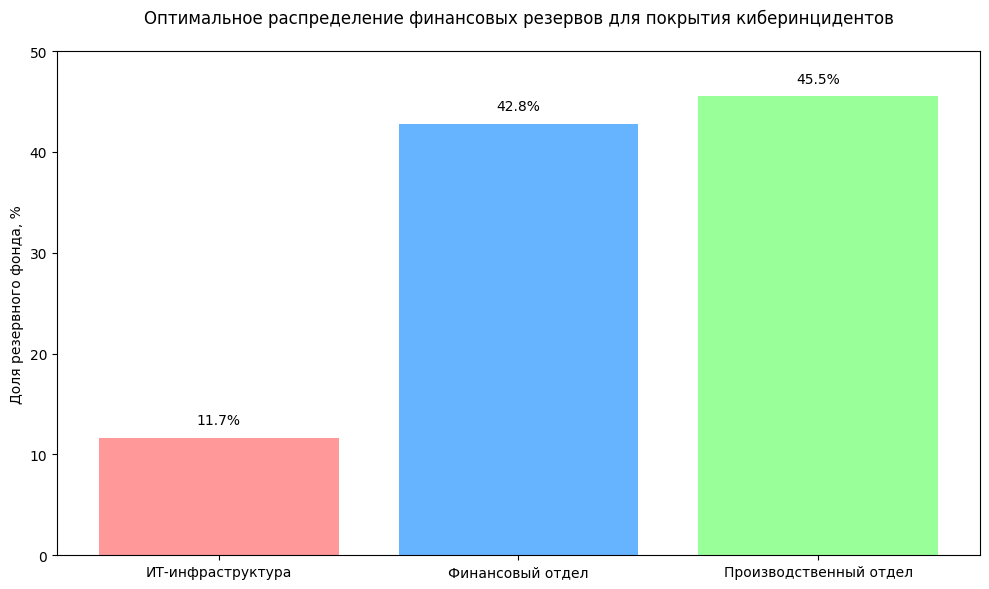

Матрица (I - L):
[[ 0.9  -0.1  -0.05]
 [-0.5   0.9  -0.4 ]
 [-0.7  -0.3   0.8 ]]

Детерминант |I - L|: 0.4330

Собственные значения матрицы L:
λ_1 = 0.662+0.000j
λ_2 = -0.131+0.032j
λ_3 = -0.131-0.032j


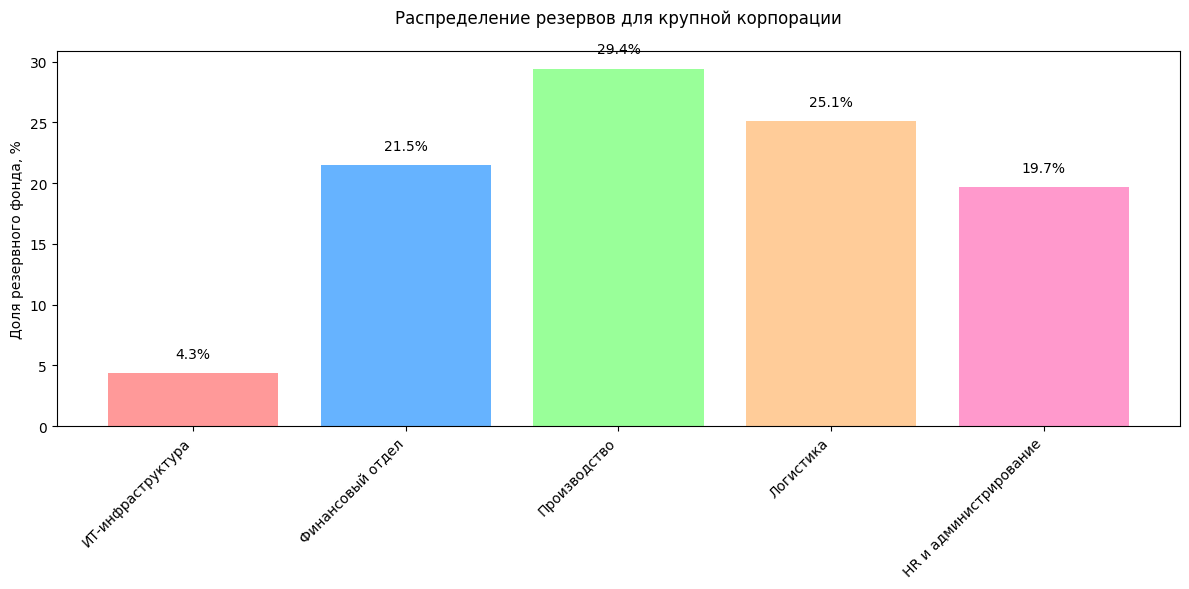

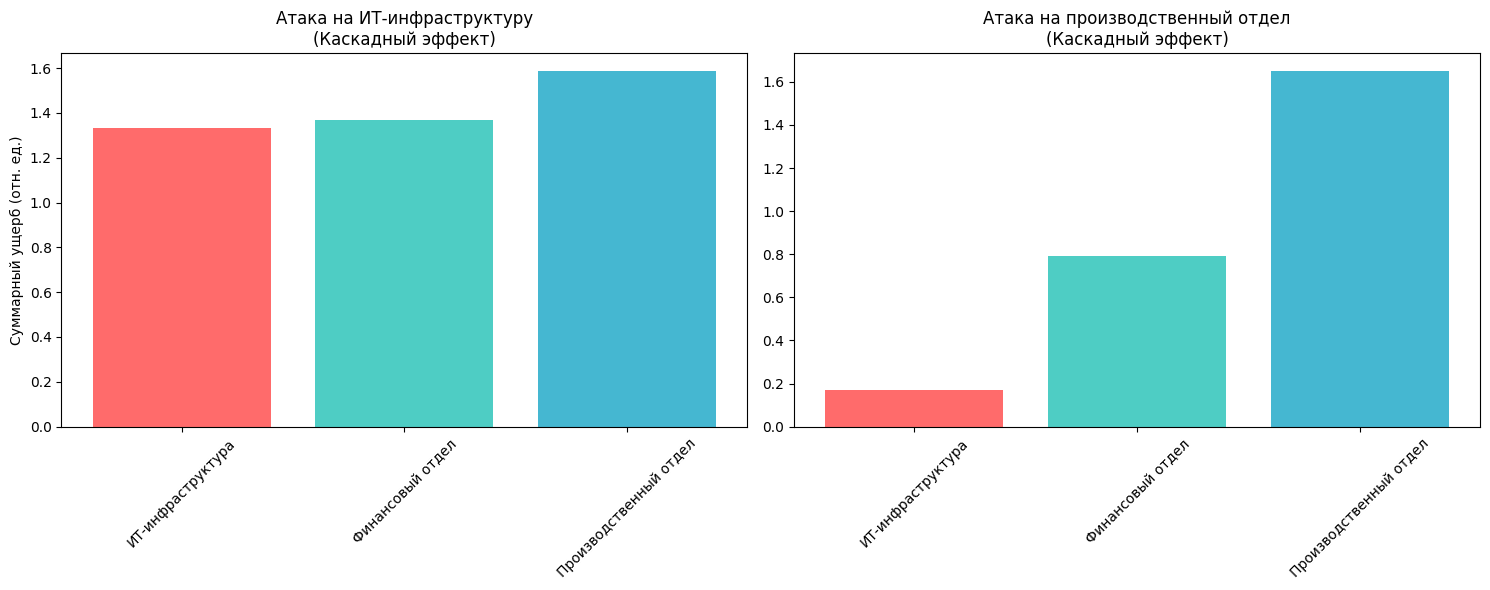

Рекомендуемое распределение резервного фонда:
ИТ-инфраструктура   :  1167371 руб. ( 11.7%)
Финансовый отдел    :  4280836 руб. ( 42.8%)
Производственный отдел:  4551793 руб. ( 45.5%)
Общий бюджет:                     10000000 руб.
Анализ чувствительности (первые 5 результатов):
 i  j coefficient  original_value  new_value                                                   reserves_change
 0  0      L[0,0]            0.10      0.110 [0.1430359655984237, -0.08456484413468957, -0.058471121463732345]
 0  1      L[0,1]            0.10      0.110   [0.5105128260165301, -0.30146181920732573, -0.2090510068091973]
 0  2      L[0,2]            0.05      0.055  [0.27404193952711253, -0.16194830020873496, -0.1120936393183598]
 1  0      L[1,0]            0.50      0.550   [-0.06083985773870815, 0.3800581072490985, -0.3192182495103921]
 1  1      L[1,1]            0.10      0.110     [-0.04519316520268113, 0.28244881471187, -0.2372556495091871]


In [ ]:
# -*- coding: utf-8 -*-
"""Адаптация модели Леонтьева для управления киберрисками.ipynb
# Адаптация модели "затраты-выпуск" Леонтьева для управления киберрисками

## Теоретическое обоснование

Классическая модель Леонтьева:
$$X = AX + Y$$

Адаптированная для ИБ:
$$R = LR + Y$$

Где:
- $R$ - вектор финансовых резервов
- $L$ - матрица коэффициентов убытков
- $Y$ - вектор внешних убытков

Для полного покрытия убытков: $Y = 0$
$$R = LR$$
$$(I - L)R = 0$$

Решение существует когда $det(I - L) = 0$, то есть когда матрица $L$ имеет собственное значение $\lambda = 1$
"""

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from numpy.linalg import eig, inv, det
import pandas as pd

# Настройка стиля графиков
plt.style.use('default')
sns.set_palette("husl")

"""## Пример 1: Малое предприятие (3 отдела)"""

# Матрица коэффициентов убытков L
# Отделы: [ИТ-инфраструктура, Финансовый отдел, Производственный отдел]
L_small = np.array([
    [0.10, 0.10, 0.05],  # Влияние на ИТ-инфраструктуру
    [0.50, 0.10, 0.40],  # Влияние на Финансовый отдел
    [0.70, 0.30, 0.20]   # Влияние на Производственный отдел
])

print("Матрица коэффициентов убытков L:")
print(L_small)

# Находим собственные значения и векторы
eigenvalues, eigenvectors = eig(L_small)

print("\nСобственные значения:")
print(eigenvalues)

print("\nСобственные векторы (столбцы):")
print(eigenvectors)

# Нормируем собственный вектор для λ ≈ 1
lambda_target = 1.0
idx = np.argmin(np.abs(eigenvalues - lambda_target))
optimal_reserves = np.real(eigenvectors[:, idx])

# Нормируем так, чтобы сумма была равна 100 (условных единиц)
optimal_reserves = optimal_reserves / np.sum(optimal_reserves) * 100

print(f"\nОптимальное распределение резервов (%):")
departments = ['ИТ-инфраструктура', 'Финансовый отдел', 'Производственный отдел']
for dept, reserve in zip(departments, optimal_reserves):
    print(f"{dept}: {reserve:.1f}%")

# Визуализация
plt.figure(figsize=(10, 6))
bars = plt.bar(departments, optimal_reserves, color=['#ff9999', '#66b3ff', '#99ff99'])
plt.title('Оптимальное распределение финансовых резервов для покрытия киберинцидентов', pad=20)
plt.ylabel('Доля резервного фонда, %')
plt.ylim(0, 50)

# Добавляем значения на столбцы
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

"""## Анализ устойчивости системы"""

# Проверяем устойчивость системы
I = np.eye(3)
stability_matrix = I - L_small

print("Матрица (I - L):")
print(stability_matrix)

print(f"\nДетерминант |I - L|: {det(stability_matrix):.4f}")

# Собственные значения матрицы L
print("\nСобственные значения матрицы L:")
for i, val in enumerate(eigenvalues):
    print(f"λ_{i+1} = {val:.3f}")

"""## Пример 2: Крупная корпорация (5 отделов)"""

# Матрица для крупной корпорации
L_large = np.array([
    [0.05, 0.08, 0.03, 0.02, 0.01],  # ИТ-инфраструктура
    [0.40, 0.06, 0.35, 0.10, 0.08],  # Финансовый отдел
    [0.60, 0.25, 0.15, 0.30, 0.20],  # Производство
    [0.20, 0.15, 0.25, 0.08, 0.35],  # Логистика
    [0.10, 0.12, 0.18, 0.25, 0.07]   # HR и администрирование
])

# Находим собственный вектор для λ ≈ 1
eigenvalues_large, eigenvectors_large = eig(L_large)
idx_large = np.argmin(np.abs(eigenvalues_large - lambda_target))
optimal_reserves_large = np.real(eigenvectors_large[:, idx_large])
optimal_reserves_large = optimal_reserves_large / np.sum(optimal_reserves_large) * 100

# Визуализация
departments_large = ['ИТ-инфраструктура', 'Финансовый отдел', 'Производство',
                    'Логистика', 'HR и администрирование']

plt.figure(figsize=(12, 6))
bars = plt.bar(departments_large, optimal_reserves_large,
              color=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99', '#ff99cc'])
plt.title('Распределение резервов для крупной корпорации', pad=20)
plt.ylabel('Доля резервного фонда, %')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{height:.1f}%', ha='center', va='bottom')

plt.tight_layout()
plt.show()

"""## Практический анализ: Сценарии кибератак"""

def simulate_attack(L_matrix, initial_impact, departments):
    """
    Симуляция каскадного эффекта кибератаки
    """
    impact = initial_impact.copy()
    total_impact = impact.copy()

    # Имитация каскадного эффекта
    for _ in range(5):  # 5 итераций для сходимости
        impact = L_matrix @ impact
        total_impact += impact

    return total_impact

# Сценарий 1: Атака на ИТ-инфраструктуру
initial_impact_IT = np.array([1.0, 0.0, 0.0])  # 100% удар по ИТ
total_impact_IT = simulate_attack(L_small, initial_impact_IT, departments)

# Сценарий 2: Атака на производственный отдел
initial_impact_prod = np.array([0.0, 0.0, 1.0])  # 100% удар по производству
total_impact_prod = simulate_attack(L_small, initial_impact_prod, departments)

# Визуализация результатов
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Сценарий 1
ax1.bar(departments, total_impact_IT, color=['#ff6b6b', '#4ecdc4', '#45b7d1'])
ax1.set_title('Атака на ИТ-инфраструктуру\n(Каскадный эффект)')
ax1.set_ylabel('Суммарный ущерб (отн. ед.)')
ax1.tick_params(axis='x', rotation=45)

# Сценарий 2
ax2.bar(departments, total_impact_prod, color=['#ff6b6b', '#4ecdc4', '#45b7d1'])
ax2.set_title('Атака на производственный отдел\n(Каскадный эффект)')
ax2.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

"""## Оптимизация резервного фонда"""

def calculate_required_reserves(L_matrix, total_budget):
    """
    Расчет требуемых резервов на основе собственного вектора
    """
    eigenvalues, eigenvectors = eig(L_matrix)
    idx = np.argmin(np.abs(eigenvalues - 1.0))
    reserves_vector = np.real(eigenvectors[:, idx])

    # Нормировка и перевод в денежные единицы
    reserves_vector = reserves_vector / np.sum(reserves_vector) * total_budget
    return reserves_vector

# Общий бюджет на кибербезопасность
total_budget = 10_000_000  # 10 млн руб.

required_reserves = calculate_required_reserves(L_small, total_budget)

print("Рекомендуемое распределение резервного фонда:")
print("=" * 50)
for dept, amount in zip(departments, required_reserves):
    print(f"{dept:20s}: {amount:8.0f} руб. ({amount/total_budget*100:5.1f}%)")

print("=" * 50)
print(f"Общий бюджет: {total_budget:28.0f} руб.")

"""## Выводы и рекомендации

1. **Критические активы**: Производственный отдел требует наибольших резервов
2. **Системные взаимосвязи**: Атака на один отдел вызывает каскадный эффект
3. **Оптимизация затрат**: Модель позволяет scientifically обосновать распределение бюджета
4. **Упреждающее управление**: Возможность моделировать различные сценарии атак

### Практические рекомендации:
- Приоритетная защита наиболее connected активов
- Создание перекрестных резервных фондов
- Регулярный пересмотр матрицы коэффициентов убытков
- Интеграция с системами страхования киберрисков
"""

# Дополнительный анализ: чувствительность модели
def sensitivity_analysis(L_matrix, variation=0.1):
    """
    Анализ чувствительности к изменению коэффициентов
    """
    results = []
    n = L_matrix.shape[0]

    for i in range(n):
        for j in range(n):
            if L_matrix[i, j] > 0:  # Только для ненулевых коэффициентов
                L_modified = L_matrix.copy()
                L_modified[i, j] *= (1 + variation)

                # Пересчет оптимальных резервов
                eigvals, eigvecs = eig(L_modified)
                idx = np.argmin(np.abs(eigvals - 1.0))
                new_reserves = np.real(eigvecs[:, idx])
                new_reserves = new_reserves / np.sum(new_reserves) * 100

                results.append({
                    'i': i, 'j': j,
                    'coefficient': f'L[{i},{j}]',
                    'original_value': L_matrix[i, j],
                    'new_value': L_modified[i, j],
                    'reserves_change': new_reserves - optimal_reserves
                })

    return pd.DataFrame(results)

# Проводим анализ чувствительности
sensitivity_df = sensitivity_analysis(L_small, variation=0.1)
print("Анализ чувствительности (первые 5 результатов):")
print(sensitivity_df.head().to_string(index=False))